Partial Differential Equations is something that is at the heart of Deep Learning. This notebook gives you a method to visualise them using tensorflow.(I will constantly update this notebook to improve the documentation).

In [0]:
# Import all the libraries

import tensorflow as tf
import numpy as np

#Libraries for visualization

import PIL.Image  # Library for opening and manipulating images
from io import BytesIO # This module is similar to the open() function except that it stores data in the buffer instead of writing it into a file
from IPython.display import clear_output,Image,display

In [0]:
def DisplayArray(a, fmt='jpeg', rng=[0,1]):
	''' This function displays an array as an picture'''
	a = (a-rng[0])/float(rng[1]-rng[0])*255
	a = np.uint8(np.clip(a,0,255))
	f= BytesIO()
	PIL.Image.fromarray(a).save(f , fmt)
	clear_output(wait = True)
	display(Image(data=f.getvalue()))
  
def make_kernel(a):
	'''Transform a 2d array into an convolutional kernel'''
	a = np.asarray(a)
	a = a.reshape(list(a.shape)+[1,1])
	return tf.constant(a , dtype=1)

def simple_conv(x, k):
	'''A convolution operation'''
	x = tf.expand_dims(tf.expand_dims(x,0),-1)
	y = tf.nn.depthwise_conv2d(x, k , [1,1,1,1], padding='SAME')
	return y[0, : , : , 0]

def laplace(x):
	'''Compute the 2d laplacian of the array'''
	laplace_k = make_kernel([[0.5, 1.0, 0.5],[1.0, -6., 1.0],[0.5, 1.0, 0.5]])

	return simple_conv(x, laplace_k)

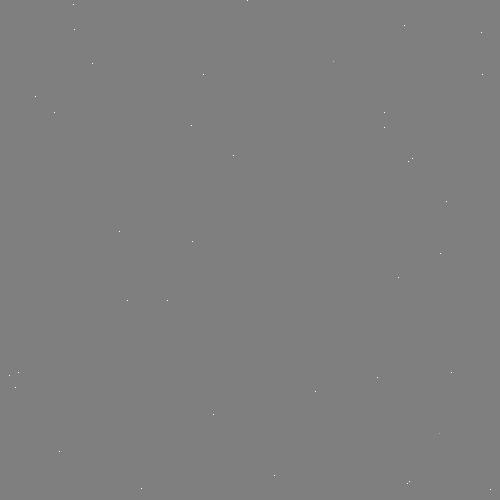

In [3]:
N = 500 # The dimensions of the pond

# We are now going to visualise what happens initially when the water drops hit the pond

u_init = np.zeros([N,N], dtype=np.float32)
ut_init = np.zeros([N,N], dtype = np.float32)

#Some rain drops hitting the pond at random points
for i in range(40):
	a,b = np.random.randint(0, N, 2)
	u_init[a,b] = np.random.uniform()

DisplayArray(u_init, rng = [-0.1,0.1])


sess = tf.InteractiveSession()

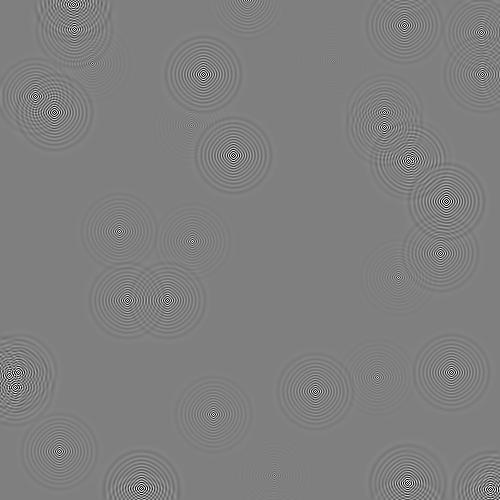

In [4]:
# Parameters
# eps: time resolution
# damping -- wave damping

eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

U = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

U_ = U + eps*Ut
Ut_ = Ut + eps*(laplace(U) - damping* Ut)

# Operation to update the state

step = tf.group(U.assign(U_) , Ut.assign(Ut_))


tf.global_variables_initializer().run()

for i in range(0,1000):
  step.run({eps:0.03, damping:0.04})
  DisplayArray(U.eval(), rng=[-0.1,0.1])